# Email
'Hi Maryam, 

Welcome again to the team, we love having new graduates join us! 

I just wanted to send a quick follow up from our conversation earlier with a few pointers around the key areas of this task to make sure we set you up for success. 

Below I have outlined your main tasks along with what we should be looking for in the data for each. 

Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

Make sure you save your analysis in the CSV files and your visualisations – we will need them for our report. If you could work on this analysis and send me your initial findings by end of next week that would be great.  

Looking forward to reviewing your work. 

Thanks, 

Zilinka'

# Datasets:
    - A year's worth of potato chip transactions
    - Client data for a region

# Step 1: Exploratory Data Analysis

## 1. Purchase Behavior Data

In [34]:
import pandas as pd
purchase_data=pd.read_csv("QVI_purchase_behaviour.csv")
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [35]:
# data size
print('shape',purchase_data.shape)

# Calculate missing values
print('-------------------')
print('Missing values for each column:')
print(purchase_data.isnull().sum())

# Check for duplicates
print('-------------------')
print('Number of duplicates:', purchase_data.duplicated().sum())

# Check for unique values
print('-------------------')
print('Number of unique values:')
print(purchase_data.nunique())

# Unique values in each column
print('-------------------')
print('Unique values in each column:')
print('- LIFESTAGE column:', purchase_data['LIFESTAGE'].unique())
print('- PREMIUM_CUSTOMER column:', purchase_data['PREMIUM_CUSTOMER'].unique())

# Data types
print('-------------------')
print('Data types:', purchase_data.dtypes)



shape (72637, 3)
-------------------
Missing values for each column:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
-------------------
Number of duplicates: 0
-------------------
Number of unique values:
LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64
-------------------
Unique values in each column:
- LIFESTAGE column: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
- PREMIUM_CUSTOMER column: ['Premium' 'Mainstream' 'Budget']
-------------------
Data types: LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


### LIFESTAGE Column Overview

The **`LIFESTAGE`** column categorizes customers based on their family status and life stage, such as whether they have children and their age group.

**Categories Explained:**
- **YOUNG SINGLES/COUPLES**: Young adults (20s–30s), no children
- **YOUNG FAMILIES**: Young parents (20s–30s) with small children
- **MIDAGE SINGLES/COUPLES**: Adults (30s–40s), no children at home
- **NEW FAMILIES**: Parents (late 20s–40s) with newborns or toddlers
- **OLDER SINGLES/COUPLES**: Adults (40s–60s), no children at home
- **OLDER FAMILIES**: Parents (40s–60s) with teenage children
- **RETIREES**: Adults aged 60

**Importance of `LIFESTAGE` in Analysis:**
- **Customer Segmentation**: Identifies different customer groups.
- **Targeted Marketing**: Enables life stage-specific promotions.
- **Sales Trends**: Shows which life stages buy the most.
- **Product Preferences**: Reveals different buying patterns by life stage.

### PREMIUM_CUSTOMER Column Overview

The **`PREMIUM_CUSTOMER`** column segments customers based on the price points and types of products they purchase. It helps distinguish between customers who prioritize quality and brand versus those who seek cost-effective options.

**Categories Explained:**
- **Premium**: Customers willing to pay more for high-quality, branded, or specialty products.
- **Mainstream**: Customers who purchase mid-range products, balancing cost and quality.
- **Budget**: Customers who consistently choose the cheapest available options.

**Importance of `PREMIUM_CUSTOMER` in Analysis:**
- **Pricing Strategies**: Identifies groups likely to respond to premium or discount pricing.
- **Product Development**: Informs product offerings across different price points.
- **Marketing Campaigns**: Helps target customers with tailored promotions based on spending behavior.
- **Sales Analysis**: Analyzes how product pricing influences purchasing patterns.



In [36]:
# Descriptive statistics
print('Descriptive statistics:')
purchase_data.describe(include='all')

Descriptive statistics:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


## 2. Transaction Data

In [67]:
transaction_data=pd.read_excel("QVI_transaction_data.xlsx",parse_dates=True)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


- **DATE:** Date of transaction
- **STORE_NBR:** Store number
- **LYLTY_CARD_NBR:** Loyalty card number
- **TXN_ID:** Transaction ID
- **PROD_NBR:** Product number
- **PROD_NAME:** Product name
- **PROD_QTY:** Number of products purchased
- **TOT_SALES:** Total sale

### 2.1. EDA

In [68]:
# data size
print('shape',transaction_data.shape)

# Data types
print('-------------------')
print('Data types:', transaction_data.dtypes)

# Calculate missing values
print('-------------------')
print('Missing Values in each column:\n',transaction_data.isnull().sum())

# Check for duplicates
print('-------------------')
print('Number of duplicates:', transaction_data.duplicated().sum())
transaction_data.drop_duplicates(inplace=True)


shape (264836, 8)
-------------------
Data types: DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
-------------------
Missing Values in each column:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
-------------------
Number of duplicates: 1


In [39]:
# Check for unique values
print('-------------------')
print('Number of unique values:')
print(transaction_data.nunique())

-------------------
Number of unique values:
DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64


### 2.2. Data types conversion and Feature Engineering

**Convert serial dates to proper date format**

In [69]:
import pandas as pd

# Convert serial dates to proper date format
transaction_data['DATE']=pd.to_datetime(transaction_data['DATE'],unit='D',origin='1899-12-30')
transaction_data=transaction_data.sort_values('DATE').reset_index(drop=True)
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-07-01,116,116179,120232,81,Pringles Original Crisps 134g,2,7.4
1,2018-07-01,226,226241,227506,34,Pringles Slt Vingar 134g,2,7.4
2,2018-07-01,230,230210,233375,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
3,2018-07-01,23,23145,19591,41,Doritos Salsa Mild 300g,2,5.2
4,2018-07-01,63,63190,60625,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8


**Convert categorical IDs columns from int to category datatype**

In [70]:
transaction_data['STORE_NBR']=transaction_data['STORE_NBR'].astype('category')
transaction_data['LYLTY_CARD_NBR']=transaction_data['LYLTY_CARD_NBR'].astype('category')
transaction_data['TXN_ID']=transaction_data['TXN_ID'].astype('category')
transaction_data['PROD_NBR']=transaction_data['PROD_NBR'].astype('category')

**Extract Brand Name and Pack size Columns**

In [71]:

# Apply the extraction directly to the transaction_data DataFrame
def extract_pack_size_and_brand(product_name):
    # Extract pack size
    pack_size = None
    size_match = pd.Series(product_name).str.extract(r'(\d{2,4})g')[0].values[0] if pd.notna(product_name) else None
    if pd.notna(size_match):
        pack_size = int(size_match)
    
    # Extract brand name (first word or first named entity)
    brand_name = product_name.split()[0].title() if pd.notna(product_name) else None

    # Correct common brand name variations
    brand_corrections = {
        'Red': 'Red Rock Deli',
        'Grain': 'Grain Waves',
        'Rrd': 'Red Rock Deli',
        'Ww': 'Woolworths',
        'Infuzions': 'Infuzions',
        'Smith': 'Smiths',
        'Dorito': 'Doritos'
    }
    brand_name = brand_corrections.get(brand_name, brand_name)

    return pack_size, brand_name

# Apply the function directly to the transaction_data DataFrame
transaction_data[['Pack_Size_(g)', 'Brand_Name']] = transaction_data['PROD_NAME'].apply(
    lambda x: pd.Series(extract_pack_size_and_brand(x))
)

# Display the updated transaction dataset
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name
0,2018-07-01,116,116179,120232,81,Pringles Original Crisps 134g,2,7.4,134.0,Pringles
1,2018-07-01,226,226241,227506,34,Pringles Slt Vingar 134g,2,7.4,134.0,Pringles
2,2018-07-01,230,230210,233375,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,Tyrrells
3,2018-07-01,23,23145,19591,41,Doritos Salsa Mild 300g,2,5.2,300.0,Doritos
4,2018-07-01,63,63190,60625,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,170.0,Smiths


In [72]:
# Brand corrections for known issues
brand_corrections = {
    'Grnwves': 'Grain Waves',
    'Infzns': 'Infuzions',
    'Snbts': 'Sunbites',
    'French': 'Unknown (french fries)'  # If it's irrelevant, we'll mark it as invalid
}

# Apply corrections
transaction_data['Brand_Name'] = transaction_data['Brand_Name'].replace(brand_corrections)
transaction_data['Brand_Name'].unique()

array(['Pringles', 'Tyrrells', 'Doritos', 'Smiths', 'Kettle', 'Thins',
       'Grain Waves', 'Woolworths', 'Infuzions', 'Tostitos',
       'Red Rock Deli', 'Cobs', 'Twisties', 'Unknown (french fries)',
       'Old', 'Cheezels', 'Ccs', 'Natural', 'Ncc', 'Cheetos', 'Sunbites',
       'Burger'], dtype=object)

In [73]:
print(f'The smallest chip packet size is {transaction_data["Pack_Size_(g)"].min()}g')
print(f'The largest chip packet size is {transaction_data["Pack_Size_(g)"].max()}g')

The smallest chip packet size is 70.0g
The largest chip packet size is 380.0g


I noticed the existing of some Salsa products.

In [75]:
# Remove salsa products
transaction_data= transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False, na=False)]


### 2.3. Descriptive Statistics

In [76]:
print('Descriptive statistics:')
transaction_data.describe(include='all')

Descriptive statistics:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name
count,246741,246741.0,246741.0,246741.0,246741.0,246741,246741.000000,246741.000000,240677.000000,246741
unique,NaN,271.0,71288.0,245257.0,105.0,105,NaN,NaN,NaN,21
top,NaN,226.0,230078.0,211119.0,102.0,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,Kettle
freq,NaN,1918.0,17.0,3.0,3304.0,3304,NaN,NaN,NaN,41288
mean,2018-12-30 01:19:32.745510144,NaN,NaN,NaN,NaN,NaN,1.908061,7.321328,175.303988,NaN
min,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,1.700000,70.000000,NaN
25%,2018-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,2.000000,5.800000,150.000000,NaN
50%,2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,2.000000,7.400000,170.000000,NaN
75%,2019-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,2.000000,8.800000,175.000000,NaN
max,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,200.000000,650.000000,380.000000,NaN


In [ ]:
#Duplicated transactions
duplicated_transactions=transaction_data[transaction_data.duplicated(subset='TXN_ID',keep=False)]
duplicated_transactions.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name
66,2018-07-01,55,55073,48884,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles
67,2018-07-01,55,55073,48884,91,CCs Tasty Cheese 175g,2,4.2,175.0,Ccs
80,2018-07-01,154,154240,154455,71,Twisties Cheese Burger 250g,2,8.6,250.0,Twisties
93,2018-07-01,154,154240,154455,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos
528,2018-07-01,129,129181,133312,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle
544,2018-07-01,129,129181,133312,32,Kettle Sea Salt And Vinegar 175g,2,10.8,175.0,Kettle
679,2018-07-01,201,201359,201500,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles
686,2018-07-01,201,201359,201500,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions
846,2018-07-02,155,155172,156136,22,Thins Chips Originl saltd 175g,2,6.6,175.0,Thins
849,2018-07-02,155,155172,156136,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150.0,Red Rock Deli


### 2.4. Outliers Detection


c:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


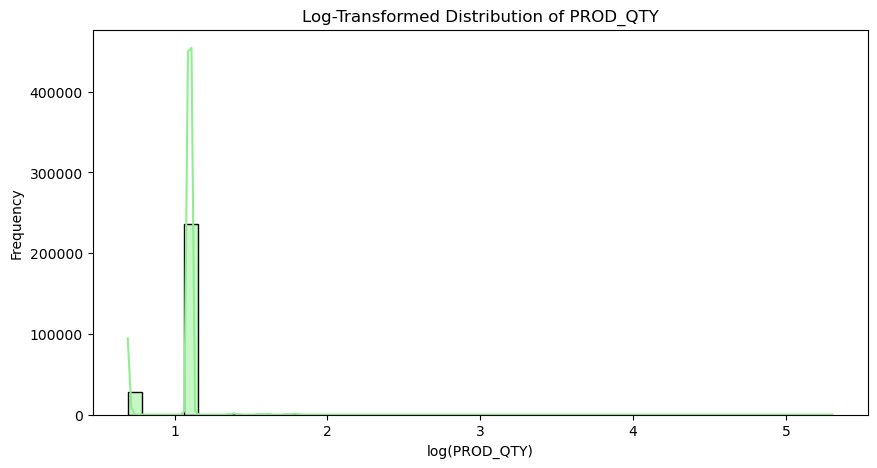

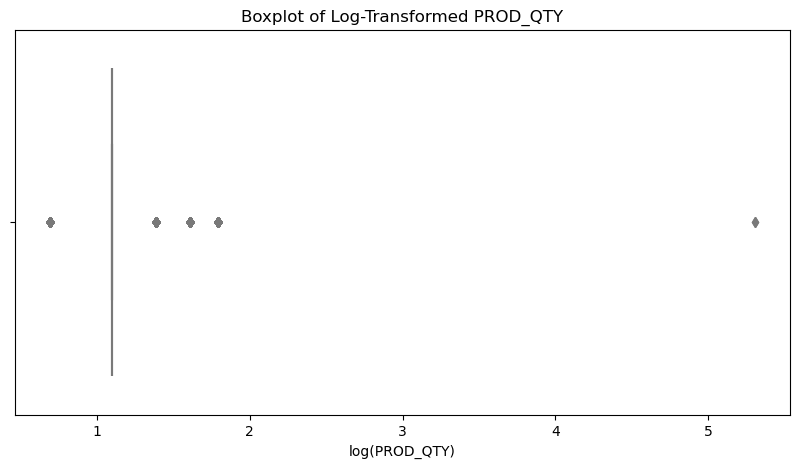

c:\Users\Maryam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


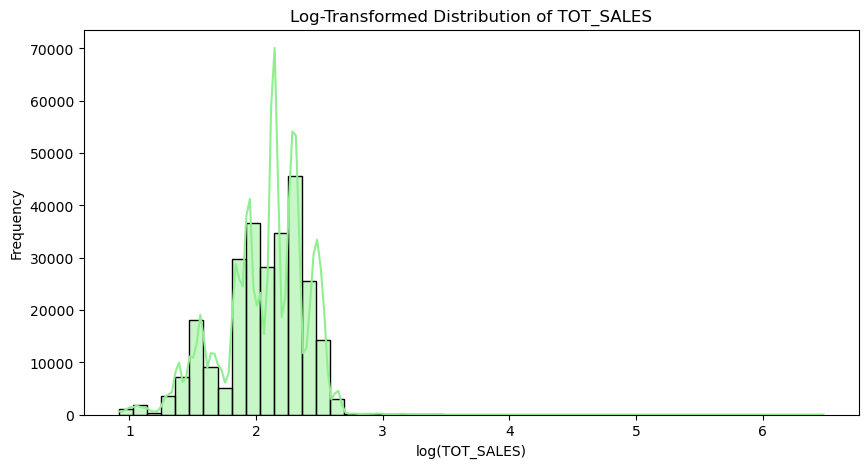

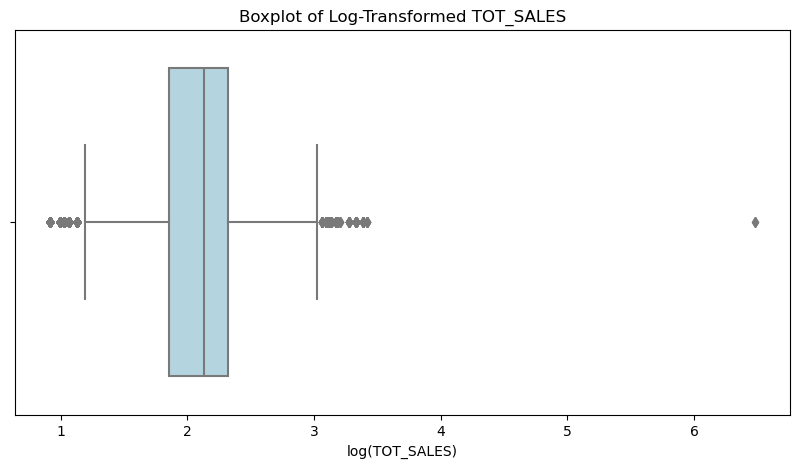

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of columns to visualize
columns_to_check = ['PROD_QTY', 'TOT_SALES', 'Pack Size (g)']

# Filter for existing columns
existing_cols = [col for col in columns_to_check if col in transaction_data.columns]

# Plot distributions with log transformations and boxplots
for col in existing_cols:
    plt.figure(figsize=(10, 5))

    # Apply log transformation to reduce skewness
    transaction_data[f'log_{col}'] = np.log1p(transaction_data[col])

    # Plot histogram with log scale
    sns.histplot(transaction_data[f'log_{col}'], kde=True, color='lightgreen', bins=50)
    plt.title(f"Log-Transformed Distribution of {col}")
    plt.xlabel(f"log({col})")
    plt.ylabel("Frequency")
    plt.show()

    # Plot zoomed-in boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=transaction_data[f'log_{col}'], color='lightblue')
    plt.title(f"Boxplot of Log-Transformed {col}")
    plt.xlabel(f"log({col})")
    plt.show()


From the  log Transformed distribution and box plot visualsation  we can draw some insights:

- **Quantity Sold:**
    -  Most values cluster around log 1, indicating small purchases per transaction.
    - A Few significant outliers appear beyond log 6 (~quantity 200)
    - *insight:* likely bulk purchases or data entery problems
- **Total Sales:**
    - A more spreadout distribution of the values, but there are distinct outliers beyond log 6 (~ 600$)
    - *insights:* outliers could be high-value bulk purchases


#### Outiers detection and handeling
our data is not normally distributed.

- Sales data often follows a log-normal distribution due to large, infrequent purchases.
- Quantity data might follow a Poisson-like distribution (most transactions have small quantities with few bulk orders).

🎯 What Should We Do?
Z-score isn't optimal for such data. Instead, let's use:

- **IQR Method** : The IQR method is a robust statistical technique to identify outliers without assuming a normal distribution.

    → Doesn't assume a normal distribution.

    → Uses quartiles to find extreme values.
    
    → More resilient to skewed data than Z-scores.

## Step 2: Merge Datasets

In [77]:
# Merge the transaction and purchase datasets
merged_data=pd.merge(transaction_data,purchase_data, how='left',on='LYLTY_CARD_NBR')
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,116,116179,120232,81,Pringles Original Crisps 134g,2,7.4,134.0,Pringles,YOUNG SINGLES/COUPLES,Mainstream
1,2018-07-01,226,226241,227506,34,Pringles Slt Vingar 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,230,230210,233375,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,Tyrrells,YOUNG FAMILIES,Premium
3,2018-07-01,63,63190,60625,61,Smiths Crinkle Cut Chips Chicken 170g,2,5.8,170.0,Smiths,RETIREES,Premium
4,2018-07-01,80,80275,79345,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,YOUNG SINGLES/COUPLES,Mainstream


In [78]:
merged_data.sort_values('TOT_SALES',ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER
218652,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380.0,Doritos,OLDER FAMILIES,Premium
33259,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380.0,Doritos,OLDER FAMILIES,Premium
32567,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smiths,RETIREES,Premium
31205,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smiths,OLDER FAMILIES,Premium
214841,2019-05-14,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,380.0,Smiths,OLDER FAMILIES,Mainstream


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer. 

It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.


In [79]:
# drop rows with LYLTY_CARD_NBR 226000
merged_data=merged_data[merged_data['LYLTY_CARD_NBR']!=226000]

Let's also check if some customers were not matched on by checking for nulls.


In [80]:
merged_data[merged_data['LYLTY_CARD_NBR'].isnull()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack_Size_(g),Brand_Name,LIFESTAGE,PREMIUM_CUSTOMER


Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

In [81]:
merged_data.to_csv('merged_data.csv',index=False)

# Step 3:  Data analysis on customer segments 

Now that our dataset is ready, we can define some metrics of interest to the client:
- how many customers in each segmet
- what is the destribution of customers by segment and purchasing behaviour
- what customer segments spend the most on chips (total sales), and how premium their purchasing behaviour generally is.
- how many chips are bought per customer by segment
- total transactions by customer segment
- what is the average chip price by customer segment


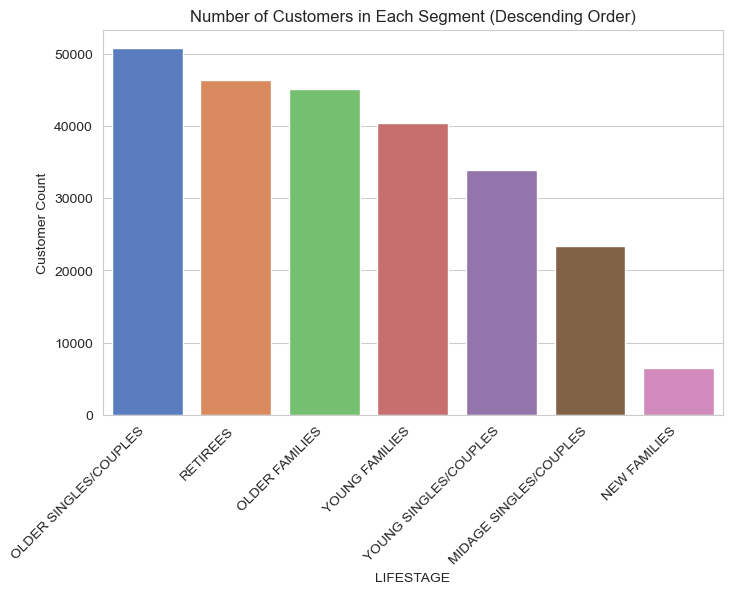

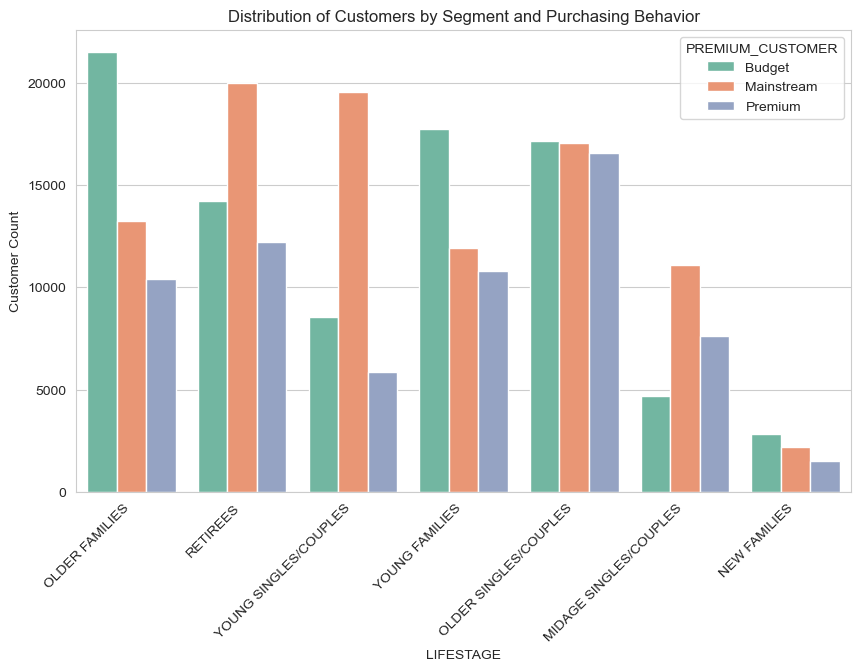

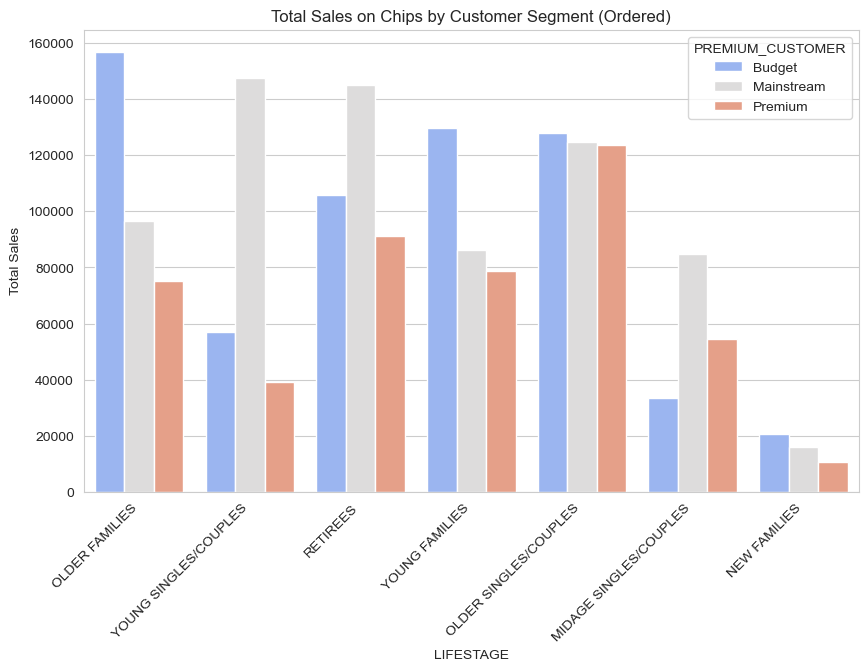

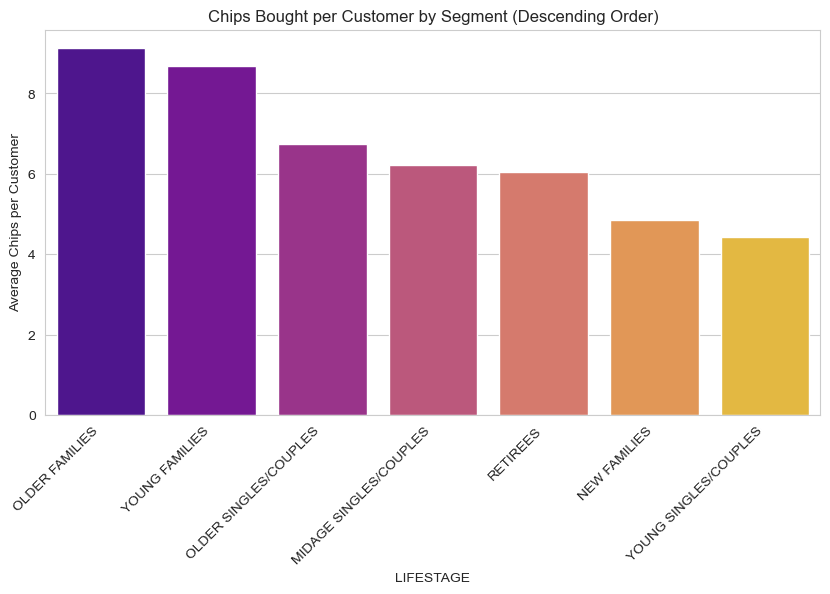

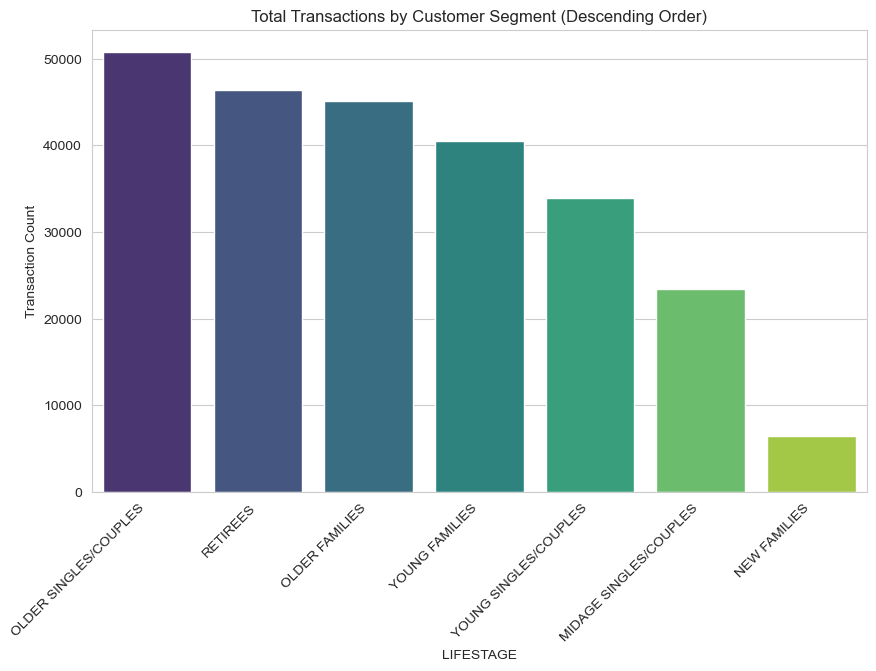

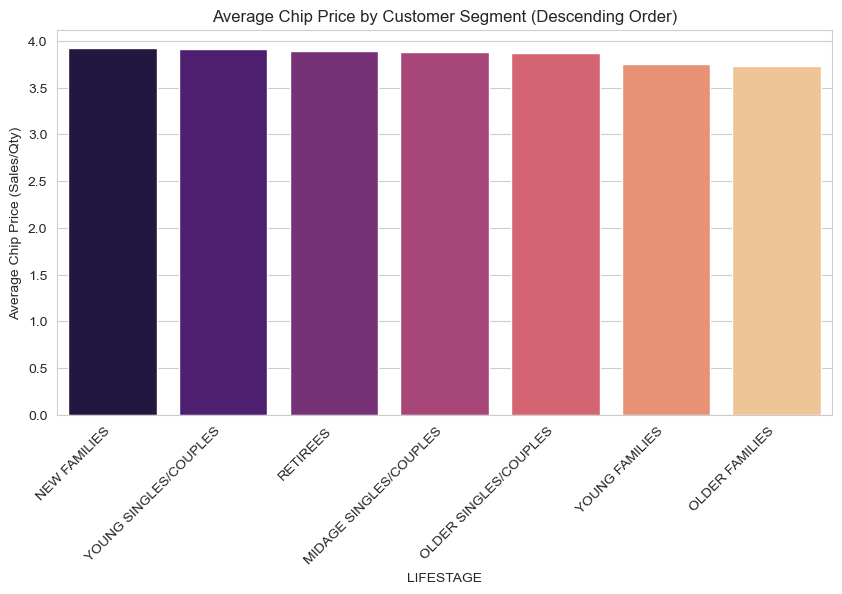

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_ordered_customer_metrics(df):
    """
    Generate visualizations for key customer metrics with ordered, sorted bars.
    """
    sns.set_style("whitegrid")

    # 1. Number of customers in each segment
    plt.figure(figsize=(8, 5))
    segment_counts = df['LIFESTAGE'].value_counts().sort_values(ascending=False)
    sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='muted')
    plt.title('Number of Customers in Each Segment (Descending Order)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Customer Count')
    plt.show()

    # 2. Distribution of customers by segment and purchasing behavior
    plt.figure(figsize=(10, 6))
    sorted_df = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
    sorted_df = sorted_df.sort_values(by='count', ascending=False)
    sns.barplot(x='LIFESTAGE', y='count', hue='PREMIUM_CUSTOMER', data=sorted_df, palette='Set2')
    plt.title('Distribution of Customers by Segment and Purchasing Behavior')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Customer Count')
    plt.show()

    # 3. Customer segments that spend the most on chips (total sales)
    sales_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
    sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=sales_by_segment, palette='coolwarm')
    plt.title('Total Sales on Chips by Customer Segment (Ordered)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Total Sales')
    plt.show()

    # 4. Chips bought per customer by segment
    chips_per_customer = df.groupby('LIFESTAGE').apply(lambda g: g['PROD_QTY'].sum() / g['LYLTY_CARD_NBR'].nunique()).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=chips_per_customer.index, y=chips_per_customer.values, palette='plasma')
    plt.title('Chips Bought per Customer by Segment (Descending Order)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Chips per Customer')
    plt.show()

    # 5. Total transactions by customer segment
    transactions_count = df['LIFESTAGE'].value_counts().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=transactions_count.index, y=transactions_count.values, palette='viridis')
    plt.title('Total Transactions by Customer Segment (Descending Order)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Transaction Count')
    plt.show()

    # 6. Average chip price by customer segment
    avg_chip_price = df.groupby('LIFESTAGE').apply(lambda g: g['TOT_SALES'].sum() / g['PROD_QTY'].sum()).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_chip_price.index, y=avg_chip_price.values, palette='magma')
    plt.title('Average Chip Price by Customer Segment (Descending Order)')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Chip Price (Sales/Qty)')
    plt.show()


# Run the visualization on the merged dataset
visualize_ordered_customer_metrics(merged_data)


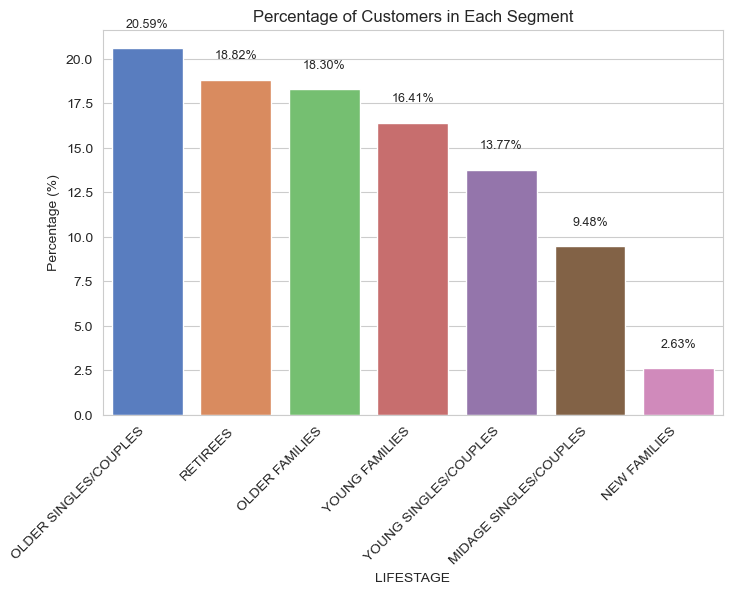

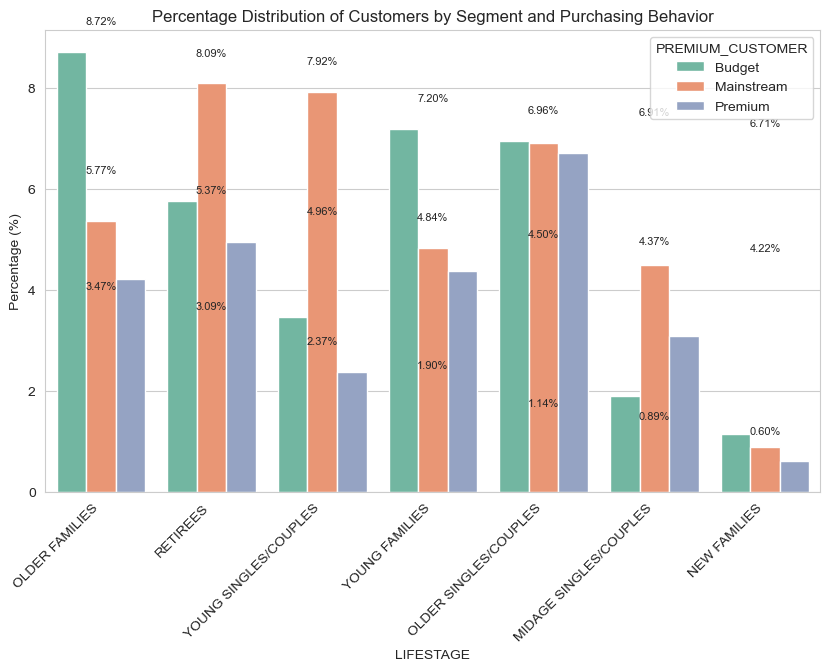

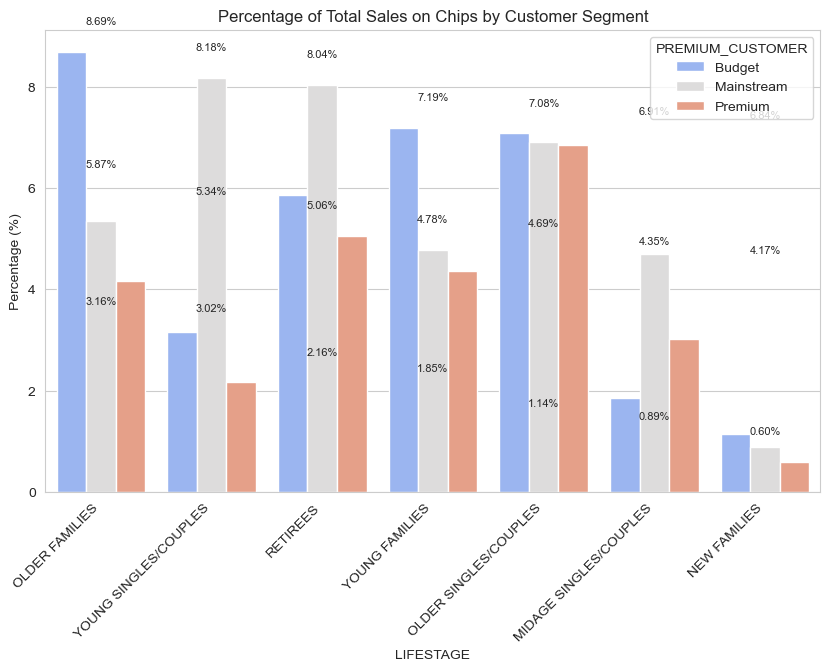

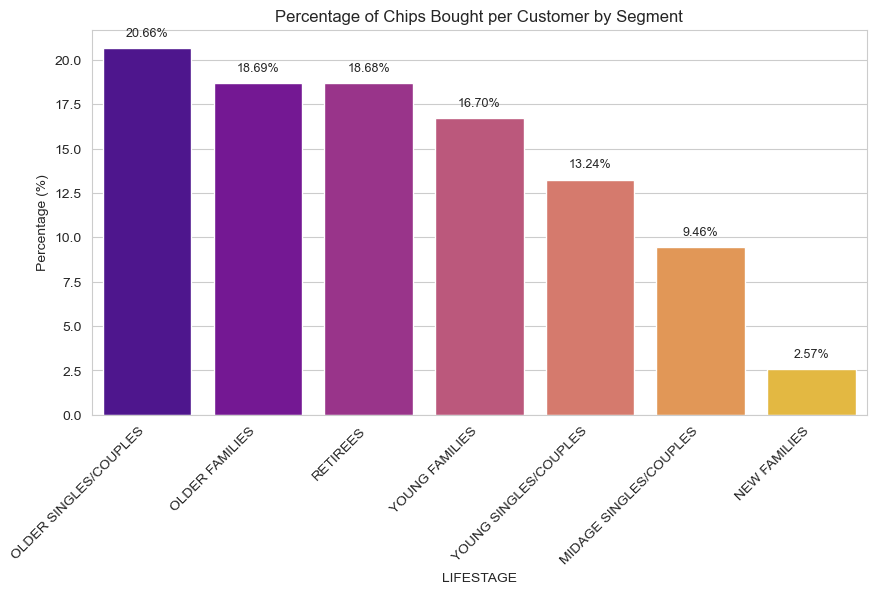

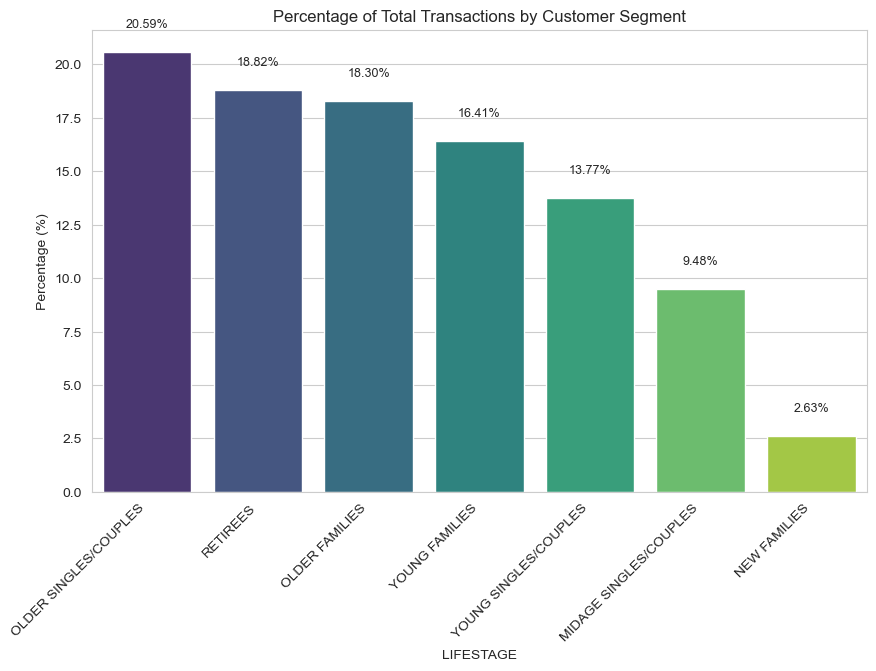

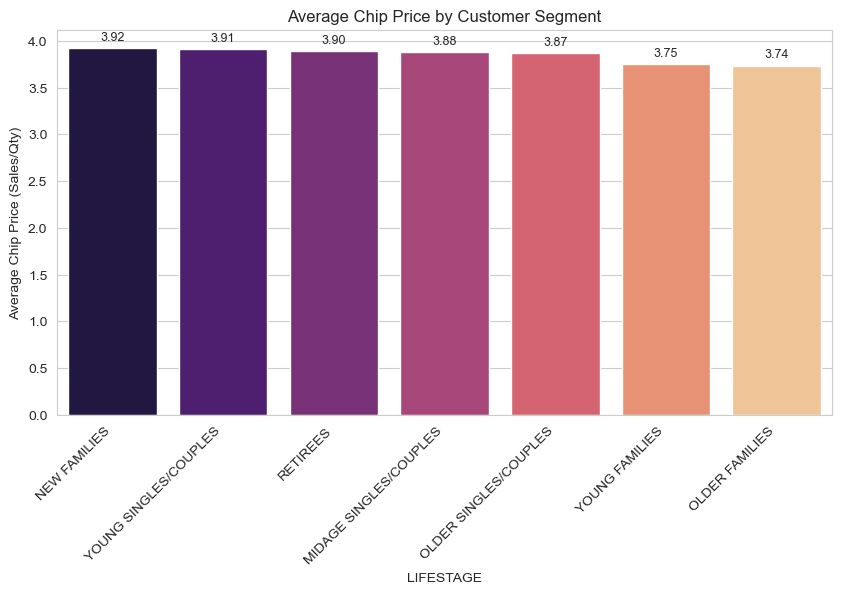

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_customer_metrics_percent(df):
    """
    Generate visualizations for key customer metrics with percentages and data labels.
    """
    sns.set_style("whitegrid")

    # 1. Percentage of customers in each segment
    plt.figure(figsize=(8, 5))
    customer_counts = df['LIFESTAGE'].value_counts(normalize=True).sort_values(ascending=False) * 100
    sns.barplot(x=customer_counts.index, y=customer_counts.values, palette='muted')
    plt.title('Percentage of Customers in Each Segment')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(customer_counts.values):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)
    plt.ylabel('Percentage (%)')
    plt.show()

    # 2. Percentage distribution of customers by segment and purchasing behavior
    plt.figure(figsize=(10, 6))
    segment_behavior = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
    total = segment_behavior['count'].sum()
    segment_behavior['percent'] = (segment_behavior['count'] / total) * 100
    segment_behavior = segment_behavior.sort_values(by='percent', ascending=False)
    sns.barplot(x='LIFESTAGE', y='percent', hue='PREMIUM_CUSTOMER', data=segment_behavior, palette='Set2')
    plt.title('Percentage Distribution of Customers by Segment and Purchasing Behavior')
    plt.xticks(rotation=45, ha='right')
    for i, row in enumerate(segment_behavior.itertuples()):
        plt.text(i % len(segment_behavior['LIFESTAGE'].unique()), row.percent + 0.5, f'{row.percent:.2f}%', ha='center', va='bottom', fontsize=8)
    plt.ylabel('Percentage (%)')
    plt.show()

    # 3. Percentage of total sales on chips by customer segment
    plt.figure(figsize=(10, 6))
    sales_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
    total_sales = sales_by_segment['TOT_SALES'].sum()
    sales_by_segment['percent'] = (sales_by_segment['TOT_SALES'] / total_sales) * 100
    sales_by_segment = sales_by_segment.sort_values(by='percent', ascending=False)
    sns.barplot(x='LIFESTAGE', y='percent', hue='PREMIUM_CUSTOMER', data=sales_by_segment, palette='coolwarm')
    plt.title('Percentage of Total Sales on Chips by Customer Segment')
    plt.xticks(rotation=45, ha='right')
    for i, row in enumerate(sales_by_segment.itertuples()):
        plt.text(i % len(sales_by_segment['LIFESTAGE'].unique()), row.percent + 0.5, f'{row.percent:.2f}%', ha='center', va='bottom', fontsize=8)
    plt.ylabel('Percentage (%)')
    plt.show()

    # 4. Percentage of chips bought per customer by segment
    total_chips = df['PROD_QTY'].sum()
    chips_per_customer = df.groupby('LIFESTAGE')['PROD_QTY'].sum() / total_chips * 100
    chips_per_customer = chips_per_customer.sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=chips_per_customer.index, y=chips_per_customer.values, palette='plasma')
    plt.title('Percentage of Chips Bought per Customer by Segment')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(chips_per_customer.values):
        plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)
    plt.ylabel('Percentage (%)')
    plt.show()

    # 5. Percentage of total transactions by customer segment
    transaction_counts = df['LIFESTAGE'].value_counts(normalize=True).sort_values(ascending=False) * 100
    plt.figure(figsize=(10, 6))
    sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
    plt.title('Percentage of Total Transactions by Customer Segment')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(transaction_counts.values):
        plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)
    plt.ylabel('Percentage (%)')
    plt.show()

    # 6. Average chip price by customer segment (absolute, not percentage)
    avg_chip_price = (df.groupby('LIFESTAGE')['TOT_SALES'].sum() / df.groupby('LIFESTAGE')['PROD_QTY'].sum()).sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_chip_price.index, y=avg_chip_price.values, palette='magma')
    plt.title('Average Chip Price by Customer Segment')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(avg_chip_price.values):
        plt.text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    plt.ylabel('Average Chip Price (Sales/Qty)')
    plt.show()


# Run the visualization on the merged dataset
visualize_customer_metrics_percent(merged_data)
